In [1]:
# Import libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# read data

data = pd.read_csv("Billionaire.csv")
print(data.head(10))

                       Name NetWorth        Country              Source  Rank  \
0                Jeff Bezos   $177 B  United States              Amazon     1   
1                 Elon Musk   $151 B  United States       Tesla, SpaceX     2   
2  Bernard Arnault & family   $150 B         France                LVMH     3   
3                Bill Gates   $124 B  United States           Microsoft     4   
4           Mark Zuckerberg    $97 B  United States            Facebook     5   
5            Warren Buffett    $96 B  United States  Berkshire Hathaway     6   
6             Larry Ellison    $93 B  United States            software     7   
7                Larry Page  $91.5 B  United States              Google     8   
8               Sergey Brin    $89 B  United States              Google     9   
9             Mukesh Ambani  $84.5 B          India         diversified    10   

    Age               Industry  
0  57.0             Technology  
1  49.0             Automotive  
2  72.0  

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB
None


In [5]:
# check data types
print(data.dtypes)

Name         object
NetWorth     object
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object


In [6]:
# print description of data set
print(data.describe())

              Rank          Age
count  2755.000000  2676.000000
mean   1345.663521    63.113602
std     772.669811    13.445153
min       1.000000    18.000000
25%     680.000000    54.000000
50%    1362.000000    63.000000
75%    2035.000000    73.000000
max    2674.000000    99.000000


In [8]:
# print random sample of data set
print(data.sample(5))

                     Name NetWorth  Country                      Source  Rank  \
56              Pang Kang  $26.4 B    China                   soy sauce    57   
2561         Fahed Hariri   $1.1 B  Lebanon   construction, investments  2524   
1401             Lam Kong   $2.3 B    China             pharmaceuticals  1362   
1612  Ke Yunfeng & family     $2 B    China                   retailing  1580   
2457    Nguyen Dang Quang   $1.2 B  Vietnam  consumer products, banking  2378   

       Age                    Industry  
56    65.0             Food & Beverage  
2561  40.0  Construction & Engineering  
1401  56.0                  Healthcare  
1612  54.0                  Healthcare  
2457  57.0             Food & Beverage  


In [10]:
# print last 15 value of dataset

print(data.tail(15))

                       Name NetWorth        Country           Source  Rank  \
2740        Wang Qiangxiang     $1 B          China  artificial turf  2674   
2741           Wang Wenjian     $1 B          China  optical devices  2674   
2742        J. Wayne Weaver     $1 B  United States            Shoes  2674   
2743            Sandy Weill     $1 B  United States        Citigroup  2674   
2744  Xia Zhisheng & family     $1 B          China  home appliances  2674   
2745                 Xu Jin     $1 B          China             wine  2674   
2746          Vadim Yakunin     $1 B         Russia         pharmacy  2674   
2747      Mark Haoyong Yang     $1 B          China       e-commerce  2674   
2748         Yao Hsiao Tung     $1 B      Singapore    Manufacturing  2674   
2749             Yu De-Chao     $1 B  United States  pharmaceuticals  2674   
2750      Daniel Yong Zhang     $1 B          China       e-commerce  2674   
2751          Zhang Yuqiang     $1 B          China       Fiberg

In [11]:
# See whether or not dataset contains missing values
print(data.isnull().sum())

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64


In [12]:
# remove missing values in data
data = data.dropna()

In [13]:
# check again missing value or not
print(data.isnull().sum())

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64


In [14]:
# print value of Networth column
print(data['NetWorth'])

0       $177 B
1       $151 B
2       $150 B
3       $124 B
4        $97 B
         ...  
2750      $1 B
2751      $1 B
2752      $1 B
2753      $1 B
2754      $1 B
Name: NetWorth, Length: 2676, dtype: object


In [16]:
# Remove "$" and "B" in "NetWorth" Columns and convert data type in float
data['NetWorth'] = data['NetWorth'].str.strip("$")
data['NetWorth'] = data['NetWorth'].str.strip("B")
data['NetWorth'] = data['NetWorth'].astype(float)

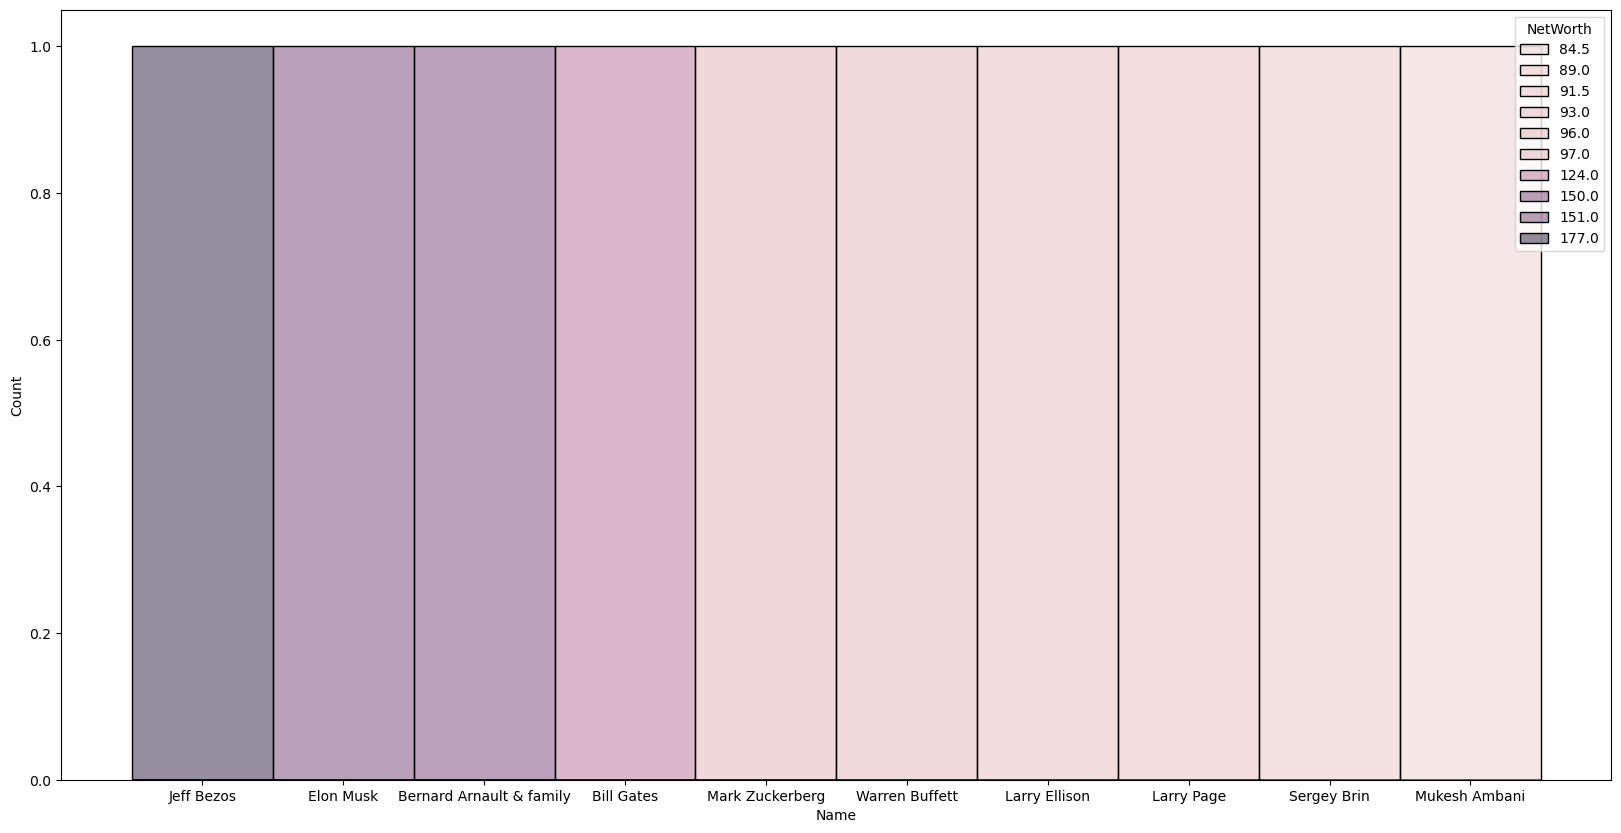

In [17]:
# Look at the top 10 billionaires according to their NetWork

df = data.sort_values(by = ['NetWorth'], ascending = False).head(10)
plt.figure(figsize=(20,10))
sns.histplot(x = 'Name', hue = 'NetWorth', data = df)
plt.show()

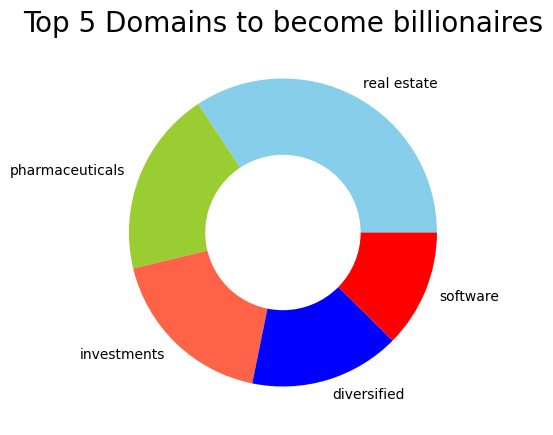

In [22]:
# Look at the top 5 domains with the most numbers of billionaires
a = data['Source'].value_counts().head()
index = a.index
sources = a.values
custom_colors = ['skyblue', 'yellowgreen', 'tomato', 'blue', 'red']
plt.figure(figsize=(5, 5))
plt.pie(sources, labels=index, colors=custom_colors)
center_circle = plt.Circle((0,0),0.5, color="white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.rc("font",size=12)
plt.title("Top 5 Domains to become billionaires",fontsize=20)
plt.show()

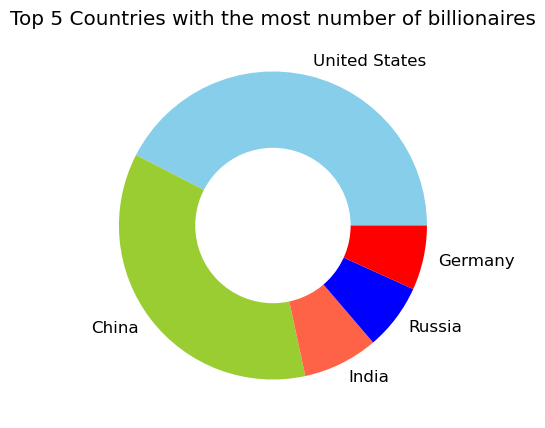

In [25]:
# Top 5 Countries with the most number of billionaires
a = data['Country'].value_counts().head()
index = a.index
Countries = a.values
custom_colors = ['skyblue','yellowgreen','tomato','blue','red']
plt.figure(figsize=(5, 5))
plt.pie(Countries, labels = index, colors = custom_colors)
center_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.rc("font", size=12)
plt.title("Top 5 Countries with the most number of billionaires")
plt.show()